# Introduction

To perform this A/B test, I used data from Montana State University's library website. They used Crazy Egg to gather data on how students interacted with different versions of the website.

The primary difference between the five versions tested was the term used to describe the services the library offered. The description of what was available at this link did not change between the five versions. It reads:

> Learn about the library and meet with us for research assistance, writing help, and tech support.

The five headers used for the link for this section were: "Interact," "Connect," "Learn," "Help," and "Services." "Interact" was the original term used, and is what will be referenced as the baseline value moving forward.

The goal of this analysis is to determine which of these terms most successfully directed students towards this section of the website.

The published article about this study is available from [University of Michigan Press](https://quod.lib.umich.edu/cgi/t/text/idx/w/weave/12535642.0001.101/--improving-library-user-experience-with-ab-testing-principles?rgn=main;view=fulltext).

# 1. Importing
## 1.1. Importing Packages

Since I will be doing the analysis of this dataset in R, I will import the tidyverse package (which includes, among others, dplyr and ggplot2). To aid in the formatting of the graphs, I will also use the ggthemes package. Lastly, I will create a generalize linear model using the broom package.

In [1]:
library(tidyverse)
library(ggthemes)
library(broom)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.3
v tibble  3.0.1     v dplyr   0.8.4
v tidyr   1.1.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## 1.2. Importing Data
While we are only interested in the data surrounding the "Interact" link, the data provided by the Crazy Egg service covers all of the elements on each of the pages. As a result, the data will have to be imported in four different dataframes.

In [2]:
#import the click data for each page version
page0 <- read.csv("crazyegg_data\\page_v0.csv")
page1 <- read.csv("crazyegg_data\\page_v1.csv")
page2 <- read.csv("crazyegg_data\\page_v2.csv")
page3 <- read.csv("crazyegg_data\\page_v3.csv")
page4 <- read.csv("crazyegg_data\\page_v4.csv")

#import the file containing total clicks and visits for each page
agg_data <- read.csv("crazyegg_data\\agg_data.csv")

# 2. Formatting Data
The dataset is quite complete, but we will only be looking at the elements that differ between the five pages. Do get the data into a format that is most usable and human-readable, we will concatenate the page data together and inner merge it with the aggregate data. We will also make some other minor naming and formatting changes.

To get the data that we will actually use to compare the treatments, we will also create two calculated columns for the proportion of clicks that were on the target element, and the proportion of visits that resulted in a click on the target element.

In [3]:
#concatenate the page dataframes so that they can be merged with agg_data
page_data <- rbind(page0, page1, page2, page3, page4)

In [4]:
#merge the two dataframes on page_data$name and agg_data$name
joined <- merge(agg_data, page_data, by.x = 'name', by.y = 'Name', all.x = TRUE)

#select the name, visits, clicks, and number of clicks cols
joined <- subset(joined, select = c(1:5, 8))
joined

name,ï..version,live_time,visits,clicks,No..clicks
CONNECT,1,20:07:34:00,2742,1587,53
HELP,3,20:04:59:00,3180,1717,38
INTERACT,0,20:04:21:00,10283,3714,42
LEARN,2,20:12:21:00,2747,1652,21
SERVICES,4,20:04:59:00,2064,1348,45


In [5]:
#renames the columns
colnames(joined) = c('name', 'page_version', 'live_time', 'page_visits', 'page_clicks', 'element_clicks')
joined

name,page_version,live_time,page_visits,page_clicks,element_clicks
CONNECT,1,20:07:34:00,2742,1587,53
HELP,3,20:04:59:00,3180,1717,38
INTERACT,0,20:04:21:00,10283,3714,42
LEARN,2,20:12:21:00,2747,1652,21
SERVICES,4,20:04:59:00,2064,1348,45


In [6]:
#create the two calcuated columns about the target element
joined <- joined %>%
    mutate(visit_conversion = element_clicks / page_visits, click_rate = element_clicks / page_clicks)

joined

name,page_version,live_time,page_visits,page_clicks,element_clicks,visit_conversion,click_rate
CONNECT,1,20:07:34:00,2742,1587,53,0.019328957,0.03339635
HELP,3,20:04:59:00,3180,1717,38,0.011949686,0.02213162
INTERACT,0,20:04:21:00,10283,3714,42,0.004084411,0.01130856
LEARN,2,20:12:21:00,2747,1652,21,0.007644703,0.01271186
SERVICES,4,20:04:59:00,2064,1348,45,0.021802326,0.03338279


# 3. Data Analysis
Next, we will analyze the statistical significance of the difference between the five iterations of the website.

First, we will plot the conversion rate and click rate for the five different versions of the web page.

## 3.1 Plot the Results of the A/B Test
In order to visualize the impact that each word had on click rate and conversion, we can create a bar graph that shows the rates for each word.

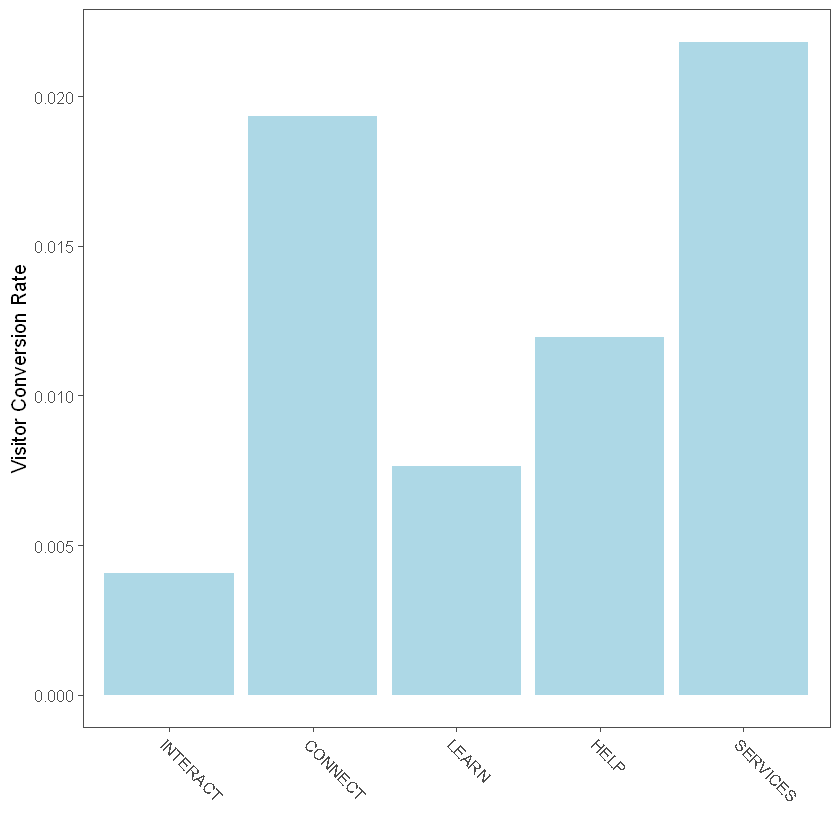

In [7]:
#plot the different visit conversion rates for the page
ggplot(joined, aes(x = reorder(name, page_version), y = visit_conversion))+
    geom_col(fill = 'LightBlue')+
    theme_few()+
    labs(y = "Visitor Conversion Rate", x = "")+
    theme(axis.text.x = element_text(angle = -45, hjust = 0, vjust = 1))

Based on this graph, every one of the alternates seems to be better than the baseline option of "Interact." Next, we will plot the click rate to see if a similar pattern emerges.

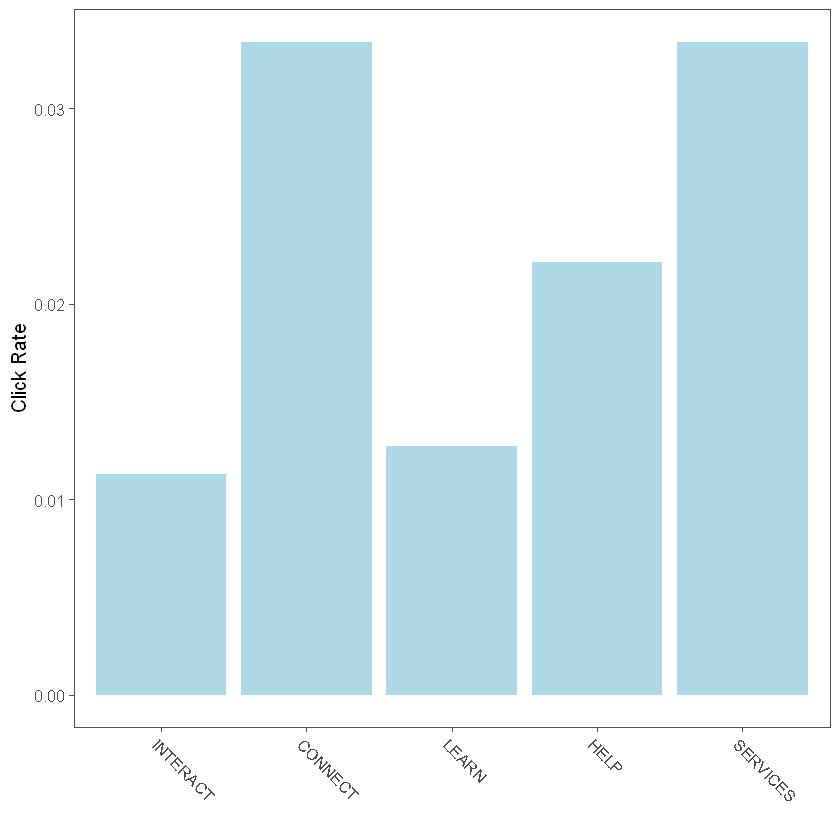

In [8]:
#plot the different click rates for the target elements
ggplot(joined, aes(x = reorder(name, page_version), y = click_rate))+
    geom_col(fill = 'LightBlue')+
    theme_few()+
    labs(y = "Click Rate", x = "")+
    theme(axis.text.x = element_text(angle = -45, hjust = 0, vjust = 1))

This bar graph looks very similar to the other, with "Interact" being the least clicked option, and "Connect" and "Services" appearing to perform the best. By both metrics, the top two option outperformed the baseline option by more than a factor of three.

To measure the level of this effect, we will create a generalized linear model for this dataset. 

## 3.2 Generalized Linear Model (GLM)
To determine the significance of the effect that each term had, we can create a GLM. Before we do that, though, we have to create granular data where none exists. We know the number of visits, as well as the number of conversions, for each treatment, so we can generate proxy user-level data to analyze using a GLM.

In [9]:
#create the five dataframes for click rate
click <- c(rep(1, times=42), rep(0, times = 3714-42))
page <- rep('INTERACT', times = 3714)
proxy0 <- data.frame(page, click)

click <- c(rep(1, times=53), rep(0, times = 1587-53))
page <- rep('CONNECT', times = 1587)
proxy1 <- data.frame(page, click)

click <- c(rep(1, times=21), rep(0, times = 1652-21))
page <- rep('LEARN', times = 1652)
proxy2 <- data.frame(page, click)

click <- c(rep(1, times=38), rep(0, times = 1717-38))
page <- rep('HELP', times = 1717)
proxy3 <- data.frame(page, click)

click <- c(rep(1, times=45), rep(0, times = 1348-45))
page <- rep('SERVICES', times = 1348)
proxy4 <- data.frame(page, click)

#vertically concatenate the five dfs together into one
proxy_df <- rbind(proxy0, proxy1, proxy2, proxy3, proxy4)

str(proxy_df)

'data.frame':	10018 obs. of  2 variables:
 $ page : Factor w/ 5 levels "INTERACT","CONNECT",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ click: num  1 1 1 1 1 1 1 1 1 1 ...


In [10]:
#use a glm to determine the p-value of the difference in click rates
glm(click~page, family = 'binomial', data = proxy_df)%>%
    tidy()

term,estimate,std.error,statistic,p.value
(Intercept),-4.4708221,0.1551829,-28.8100236,1.606471e-182
pageCONNECT,1.1054801,0.2088098,5.2941959,1.195412e-07
pageLEARN,0.1183960,0.2689123,0.4402773,6.597363e-01
pageHELP,0.6824546,0.2258165,3.0221642,2.509743e-03
pageSERVICES,1.1050600,0.2169595,5.0933943,3.517092e-07


As expected, the "Connect" and "Services" versions exhibit an improvement over "Interact" that is highly statistically significant. 

# Conclusion
Both "Connect" and "Services" showed radical improvements (on the order of 3x) in both click rate as well as visit conversion rate. Analysis of a proxy dataset generated from the aggregated data indicated that this improvement was highly statistically  significant, and had a meaningful impact on user interaction and experience.